### The University of Melbourne, School of Computing and Information Systems
# COMP90086 Computer Vision, 2021 Semester 2

## Assignment 1

**Student Name:**    Jiawei Luo

**Student ID:**     1114028

This iPython notebook is a template which you should use for your Assignment 1 submission. This file should be submitted at the **Assignment 1: Code** link on the LMS, along with any images needed to run your code.

In addition to this file, you should submit a writren report explaining your results at the **Assignment 1: Report** link on the LMS. Please see the assignment specification for details on what must be included in the report for each question.

*Adding proper comments to your code is MANDATORY.*

### 1. Mapping between world and image coordinates
Note: Writing code for this question is optional. However, if you do not include code here you *must* show your computation steps in your written report.

In [1]:
# point A (750, 122)
# point B (750, 273)
# A： 21.5 cm, B： 9cm
# image (1500, 1000)
# pointA = (750, 122)
# pointB = (750, 273)
# Width = 1500
# Length = 1000
# (1500, 1000) -> (22.2mm, 14.8mm) one pixel is 0.0148mm * 0.0148mm,
# therefore the object height of A and B is 5.5944mm and 3.3596mm in sensor
# for B : 32 mm/ 3.3596mm = z / 90mm => z = 857.245 mm
# for A : 32 mm/ 5.5944mm = x / 215mm => x = 1229.8 mm 

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cv2
import os



### 2. Secret messages with bandpass filters

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cv2
import os

img_message = cv2.imread("Q2Message.jpg")
img_cover = cv2.imread("Q2Cover.jpg")

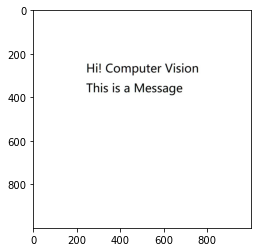

In [3]:
plt.imshow(img_message)

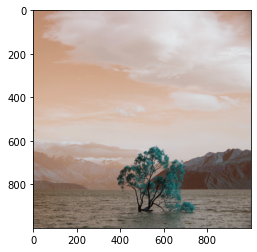

In [4]:
plt.imshow(img_cover)

In [5]:
# reference from tutorial week 2
def convey_img(image, *args, **kwargs):
    if len(image.shape) == 3:
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
      image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    return image

In [6]:
# resize image
image_width = 1000
img_message_resize= cv2.resize(img_message, (image_width, image_width),interpolation = cv2.INTER_CUBIC)
img_cover_resize= cv2.resize(img_cover, (image_width, image_width),interpolation = cv2.INTER_CUBIC)
print(img_message.shape)
print(img_message.size)
print(img_message.dtype)

(1000, 1000, 3)
3000000
uint8


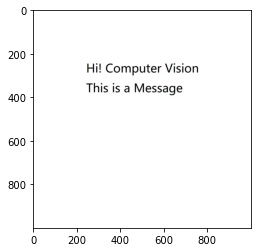

In [7]:
# convert form BGR to RGB
img_message_r_c = convey_img(img_message_resize)
img_cover_r_c = convey_img(img_cover_resize)
plt.imshow(img_message_r_c)

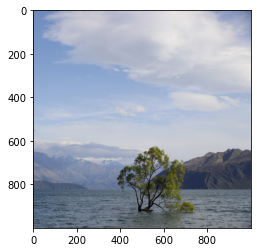

In [8]:
plt.imshow(img_cover_r_c)

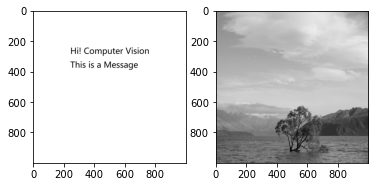

In [9]:
# gray scale to images
img_message_r_c_g = cv2.cvtColor(img_message_r_c, cv2.COLOR_RGB2GRAY)
img_cover_r_c_g = cv2.cvtColor(img_cover_r_c, cv2.COLOR_RGB2GRAY)
plt.subplot(1, 2, 1)
plt.imshow(img_message_r_c_g,cmap = "gray")
plt.subplot(1, 2, 2)
plt.imshow(img_cover_r_c_g,cmap = "gray")


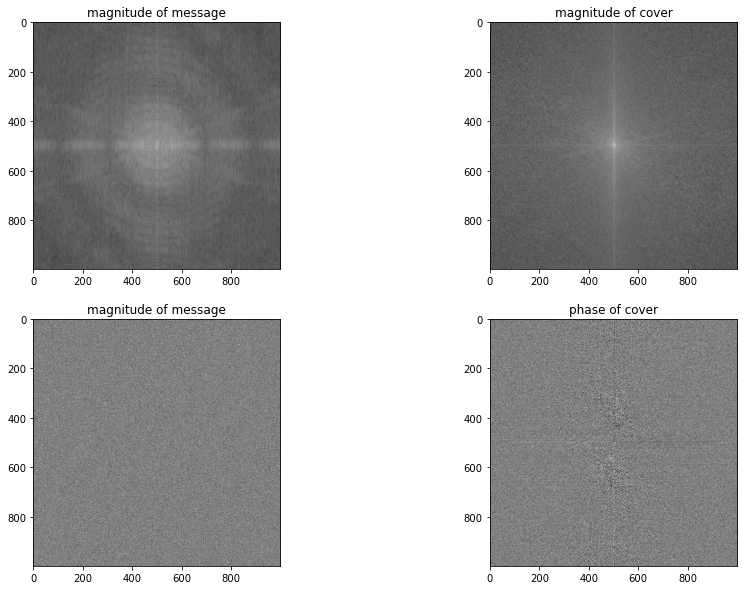

In [10]:
# transfer to Fourier domain
def fourier_trans(image):
    # Fourier transform
    fimg = np.fft.fft2(image)
    fimg = np.fft.fftshift(fimg)
    
    # Fourier phase and magnitude
    phase = np.angle(fimg)
    magnitude = np.log(np.abs(fimg))
    return fimg, phase, magnitude

img_message_f, phase_message, magnitude_message = fourier_trans(img_message_r_c_g)
img_cover_f, phase_cover, magnitude_cover= fourier_trans(img_cover_r_c_g)

# print(img_message_f)
# print(phase_message)

fig,axs = plt.subplots(2,2)
fig.set_figwidth(15)
fig.set_figheight(10)
plt.subplot(2, 2, 1)
plt.imshow(magnitude_message,cmap = "gray")
plt.title('magnitude of message')

plt.subplot(2, 2, 2)
plt.imshow(magnitude_cover,cmap = "gray")
plt.title('magnitude of cover')

plt.subplot(2, 2, 3)
plt.imshow(phase_message,cmap = "gray")
plt.title('magnitude of message')

plt.subplot(2, 2, 4)
plt.imshow(phase_cover,cmap = "gray")
plt.title('phase of cover')

plt.show()

In [11]:
# refer to function Gauss_LowPass(f,radius_low) in tutorial week 3
def Gauss_LowPass(f,radius_low):
    m = f.shape[0]
    n = f.shape[1]
    mask = np.zeros((m, n))
  
    x0 = np.floor(m/2)
    y0 = np.floor(n/2)
    for i in range(m):
        for j in range(n):
            dis = np.sqrt((i - x0)**2 + (j - y0)**2)
            mask[i][j] = np.exp((-1)*dis**2/2/(radius_low**2))
    
    result = np.multiply(f, mask) 
    return result,mask
    
def Gauss_HighPass(f,radius_High):
    m = f.shape[0]
    n = f.shape[1]
    mask = np.zeros((m, n))
  
    x0 = np.floor(m/2)
    y0 = np.floor(n/2)
    for i in range(m):
        for j in range(n):
            dis = np.sqrt((i - x0)**2 + (j - y0)**2)
            mask[i][j] = 1-np.exp((-1)*dis**2/2/(radius_High**2))
    
    result = np.multiply(f, mask) 
    return result,mask
    

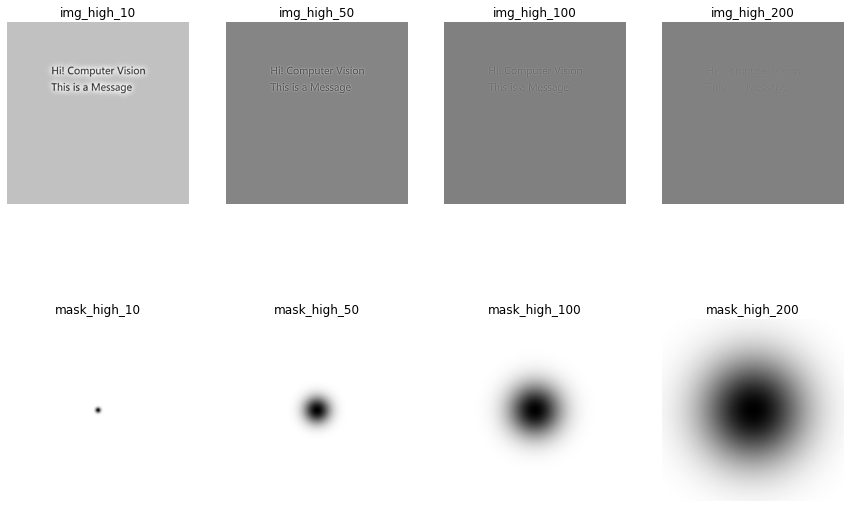

In [12]:
# test for different threshold for high pass filter
radius_High_10 = 10
radius_High_50= 50
radius_High_100 = 100
radius_High_200 = 200


test_h_10,mask_high_10 = Gauss_HighPass(img_message_f,radius_High_10)
img_high_10 = np.real(np.fft.ifft2(np.fft.fftshift(test_h_10)))

test_h_50,mask_high_50 = Gauss_HighPass(img_message_f,radius_High_50)
img_high_50 = np.real(np.fft.ifft2(np.fft.fftshift(test_h_50)))

test_h_100,mask_high_100 = Gauss_HighPass(img_message_f,radius_High_100)
img_high_100 = np.real(np.fft.ifft2(np.fft.fftshift(test_h_100)))

test_h_200,mask_high_200 = Gauss_HighPass(img_message_f,radius_High_200)
img_high_200 = np.real(np.fft.ifft2(np.fft.fftshift(test_h_200)))


fig,axs = plt.subplots(2,4)
fig.set_figwidth(15)
fig.set_figheight(10)
plt.subplot(2,4,1)
plt.imshow(img_high_10 ,cmap='gray')  
plt.title('img_high_10')
plt.axis('off')
plt.subplot(2,4,5)
plt.imshow(mask_high_10 ,cmap='gray')  
plt.title('mask_high_10')
plt.axis('off')

plt.subplot(2,4,2)
plt.imshow(img_high_50 ,cmap='gray')  
plt.title('img_high_50')
plt.axis('off')
plt.subplot(2,4,6)
plt.imshow(mask_high_50 ,cmap='gray')  
plt.title('mask_high_50')
plt.axis('off')

plt.subplot(2,4,3)
plt.imshow(img_high_100 ,cmap='gray')  
plt.title('img_high_100')
plt.axis('off')
plt.subplot(2,4,7)
plt.imshow(mask_high_100 ,cmap='gray')  
plt.title('mask_high_100')
plt.axis('off')


plt.subplot(2,4,4)
plt.imshow(img_high_200 ,cmap='gray')  
plt.title('img_high_200')
plt.axis('off')
plt.subplot(2,4,8)
plt.imshow(mask_high_200 ,cmap='gray')  
plt.title('mask_high_200')
plt.axis('off')

plt.show()

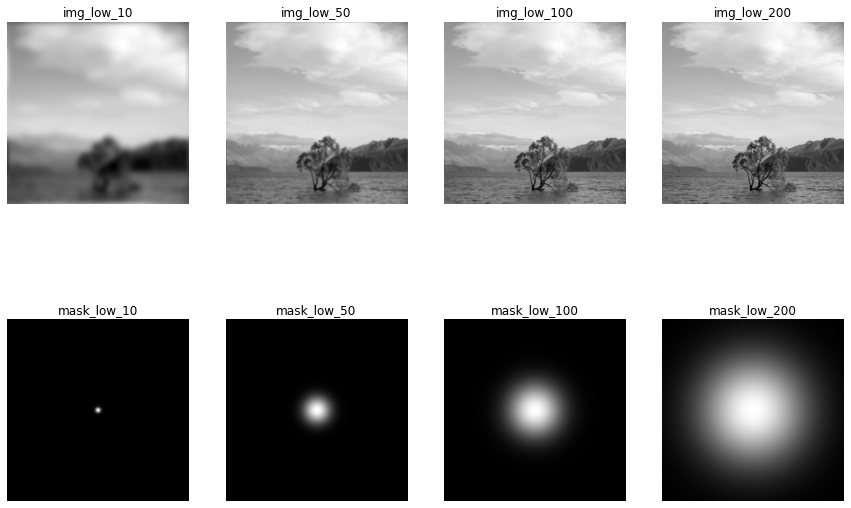

In [13]:
# test for different threshold for low pass filter
radius_Low_10 = 10
radius_Low_50= 50
radius_Low_100 = 100
radius_Low_200 = 200


test_L_10,mask_low_10 = Gauss_LowPass(img_cover_f,radius_Low_10)
img_low_10 = np.real(np.fft.ifft2(np.fft.fftshift(test_L_10)))

test_L_50,mask_low_50 = Gauss_LowPass(img_cover_f,radius_Low_50)
img_low_50 = np.real(np.fft.ifft2(np.fft.fftshift(test_L_50)))

test_L_100,mask_low_100 = Gauss_LowPass(img_cover_f,radius_Low_100)
img_low_100 = np.real(np.fft.ifft2(np.fft.fftshift(test_L_100)))

test_L_200,mask_low_200 = Gauss_LowPass(img_cover_f,radius_Low_200)
img_low_200 = np.real(np.fft.ifft2(np.fft.fftshift(test_L_200)))


fig,axs = plt.subplots(2,4)
fig.set_figwidth(15)
fig.set_figheight(10)
plt.subplot(2,4,1)
plt.imshow(img_low_10 ,cmap='gray')  
plt.title('img_low_10')
plt.axis('off')
plt.subplot(2,4,5)
plt.imshow(mask_low_10 ,cmap='gray')  
plt.title('mask_low_10')
plt.axis('off')

plt.subplot(2,4,2)
plt.imshow(img_low_50 ,cmap='gray')  
plt.title('img_low_50')
plt.axis('off')
plt.subplot(2,4,6)
plt.imshow(mask_low_50 ,cmap='gray')  
plt.title('mask_low_50')
plt.axis('off')

plt.subplot(2,4,3)
plt.imshow(img_low_100 ,cmap='gray')  
plt.title('img_low_100')
plt.axis('off')
plt.subplot(2,4,7)
plt.imshow(mask_low_100 ,cmap='gray')  
plt.title('mask_low_100')
plt.axis('off')


plt.subplot(2,4,4)
plt.imshow(img_low_200 ,cmap='gray')  
plt.title('img_low_200')
plt.axis('off')
plt.subplot(2,4,8)
plt.imshow(mask_low_200 ,cmap='gray')  
plt.title('mask_low_200')
plt.axis('off')

plt.show()

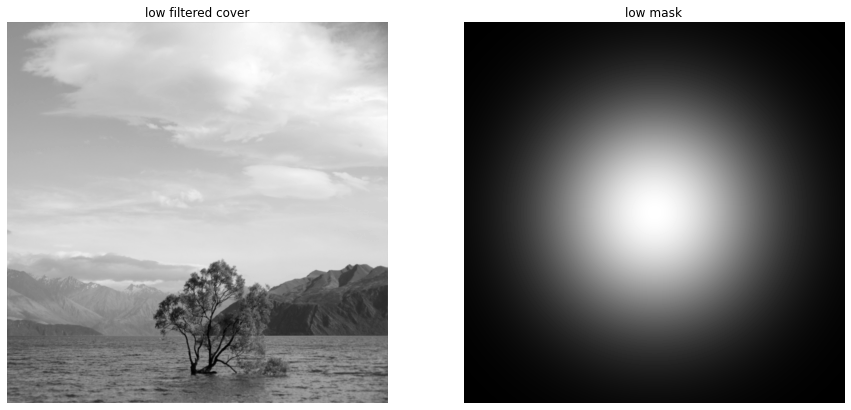

In [14]:
radius_low = 200
# pass cover image to gaussian low pass filter
img_cover_f_low_filtered,mask_low = Gauss_LowPass(img_cover_f,radius_low)

f_low = np.fft.fftshift(img_cover_f_low_filtered)
img_low = np.real(np.fft.ifft2(f_low))

fig,axs = plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_figheight(15)
plt.subplot(1,2,1)
plt.imshow(img_low ,cmap='gray')  
plt.title('low filtered cover')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(mask_low ,cmap='gray')  
plt.title('low mask')
plt.axis('off')
plt.show()

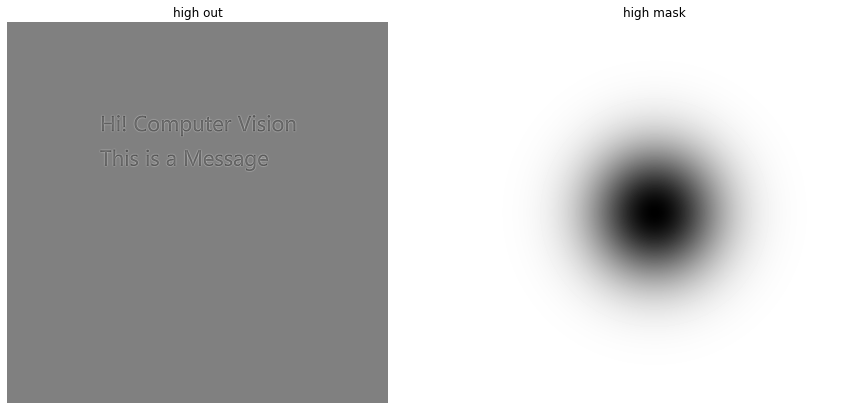

In [15]:
radius_High = 120

# pass message image to gaussian high pass filter
img_message_f_high_filtered,mask_high = Gauss_HighPass(img_message_f,radius_High)

# inverse transfer message image to time domain
f_high = np.fft.fftshift(img_message_f_high_filtered)
img_high = np.real(np.fft.ifft2(f_high))

# img_high = np.real(np.fft.ifft2(np.fft.fftshift(img_message_f_high_filtered)))

fig,axs = plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_figheight(10)
plt.subplot(1,2,1)
plt.imshow(img_high ,cmap='gray')  
plt.title('high out')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(mask_high ,cmap='gray')  
plt.title('high mask')
plt.axis('off')

plt.show()

C:\Users\49323\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


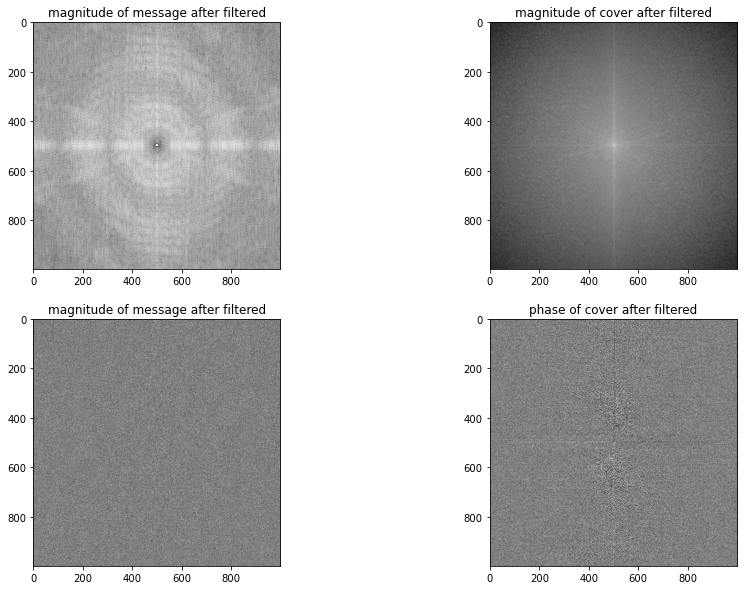

In [16]:
# plot phase and magnitude after filtered
img_high_f, phase_high, magnitude_high = fourier_trans(img_high)
img_low_f, phase_low, magnitude_low= fourier_trans(img_low)

# print(img_message_f)
# print(phase_message)

fig,axs = plt.subplots(2,2)
fig.set_figwidth(15)
fig.set_figheight(10)
plt.subplot(2, 2, 1)
plt.imshow(magnitude_high,cmap = "gray")
plt.title('magnitude of message after filtered')

plt.subplot(2, 2, 2)
plt.imshow(magnitude_low,cmap = "gray")
plt.title('magnitude of cover after filtered')

plt.subplot(2, 2, 3)
plt.imshow(phase_high,cmap = "gray")
plt.title('magnitude of message after filtered')

plt.subplot(2, 2, 4)
plt.imshow(phase_low,cmap = "gray")
plt.title('phase of cover after filtered')

plt.show()

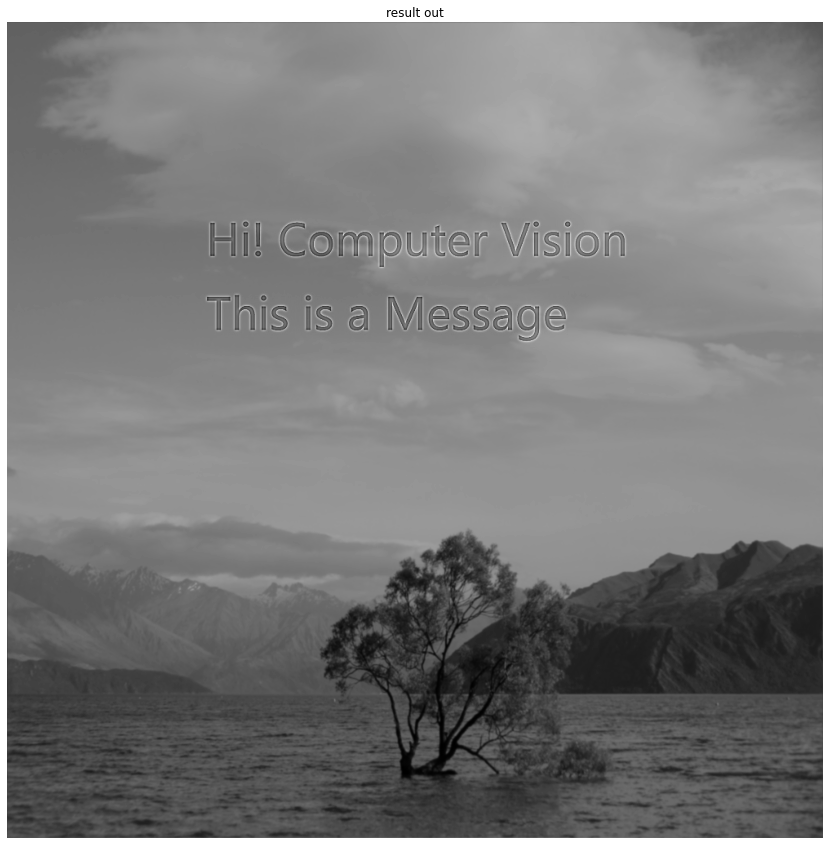

In [17]:
# add cover and message in frequency domain and transfer back to real domain
mag_result = np.add(img_message_f_high_filtered, img_cover_f_low_filtered) 
img_result = np.real(np.fft.ifft2(np.fft.fftshift(mag_result)))

# show result 
fig,axs = plt.subplots(1,1)
fig.set_figwidth(15)
fig.set_figheight(15)
plt.imshow(img_result ,cmap='gray')  
plt.title('result out')
plt.axis('off')
plt.show()

In [31]:
cv2.imwrite("Q2_result.jpg", img_result)

True